In [81]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [82]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_exp1.csv")
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
print(data.shape)

(169271, 28)


In [83]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_i2_noise.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data2=data2[data2.pxt<=0.06]
data2=data2.drop_duplicates()
print(data2.shape)

(169271, 28)


In [84]:
data=data[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2','neh']]
data2=data2[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2','neh']]

temp_merged=data.merge(data2,on=['pep','pxt'])
print(temp_merged.shape)


(169271, 16)


In [85]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))

In [7]:
k=58
temp_merged=data.merge(data2,on=['pep','pxt'])
temp_merged=temp_merged.loc[k:k,:]
temp_merged=temp_merged.reset_index(drop=True)
temp_merged

,pep,cpxt_x,pxt,delta1_x,delta2_x,i0_x,i1_x,i2_x,neh_x,cpxt_y,delta1_y,delta2_y,i0_y,i1_y,i2_y,neh_y
0,DSTLIMQLLR,0.0591,0.0591,1.005318,1.128255,0.183086,0.303286,0.258738,16,0.073977,1.005318,1.119669,0.183086,0.303286,0.257166,16


In [8]:
temp_res=[]
temp_pxt=[]
for index in range(1):
    pxt        =temp_merged.pxt[index]
    delta2_x   =temp_merged.delta2_x[index]
    delta1_x   =temp_merged.delta1_x[index]
    i1_x       =temp_merged.i1_x    [index]
    i0_x       =temp_merged.i0_x    [index]
    i2_x       =temp_merged.i2_x    [index]
    x=delta2_x
    res=[]
    xs=[]
    ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
    print(ccpxt,pxt)
    
    for i in range(1,100):        
        xs.append(x+i*x/1000)        
        temp_res.append( (x - (x+i*x/1000))/x)
        temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)  
        
        xs.append(x-i*x/1000)
        temp_res.append( (x - (x -i*x/1000))/x)
        temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt) 
    

0.059393571135023304 0.0591


,pxt_err,delta_2_err
96,-2.213750,-0.049
94,-2.162402,-0.048
92,-2.111346,-0.047
90,-2.060579,-0.046
88,-2.010098,-0.045


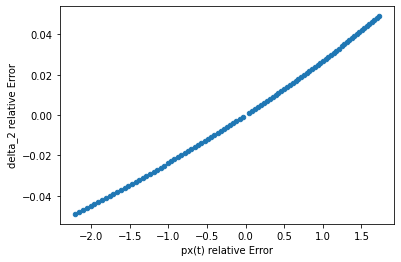

In [14]:
df=pd.DataFrame([temp_pxt,temp_res]).transpose()
df.columns=['pxt_err','delta_2_err']
# df=df[ df['xs']<20 ] 
plt.scatter(df['pxt_err'],df.delta_2_err,s=20)
plt.xlabel("px(t) relative Error")
plt.ylabel("delta_2 relative Error")
df.sort_values(by='pxt_err').head()


In [10]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))
    

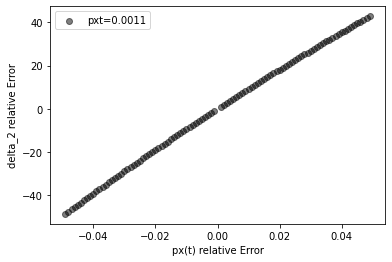

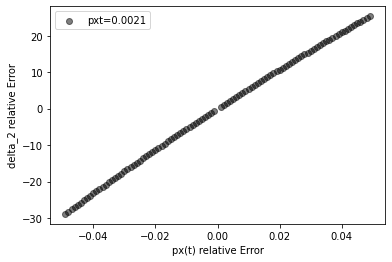

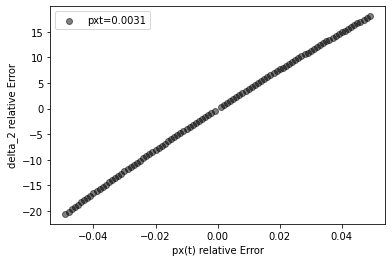

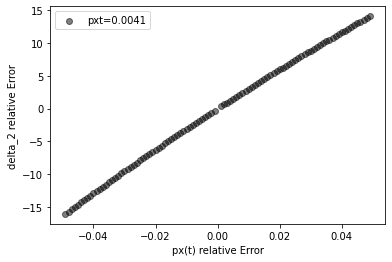

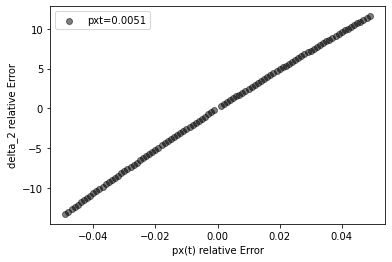

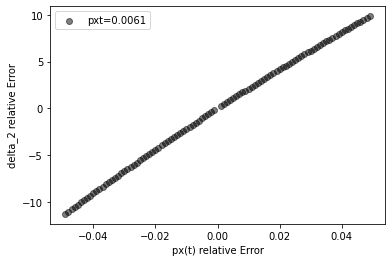

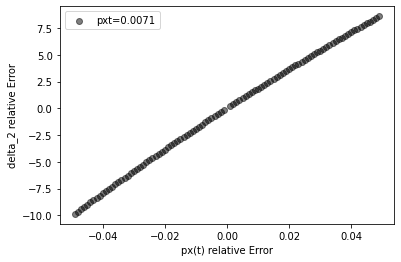

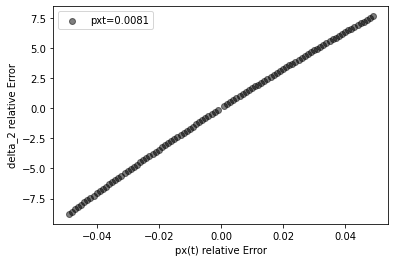

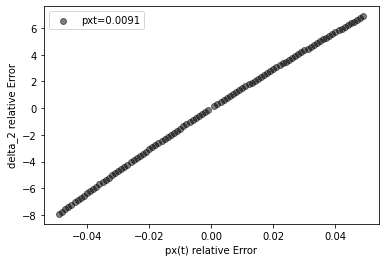

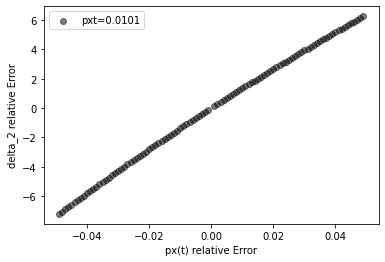

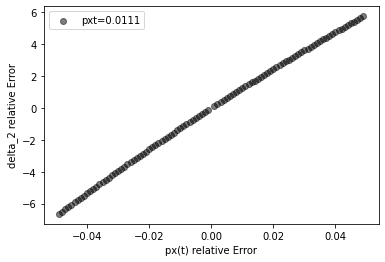

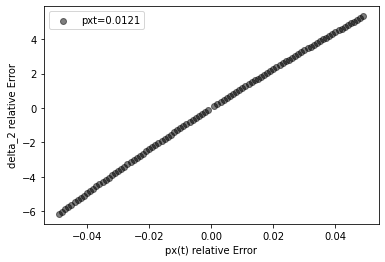

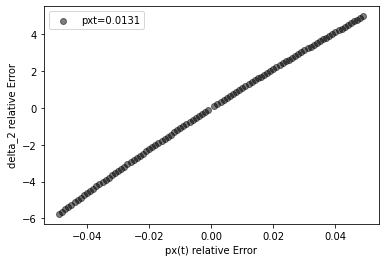

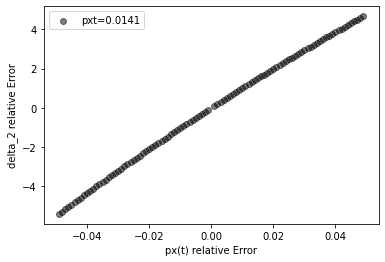

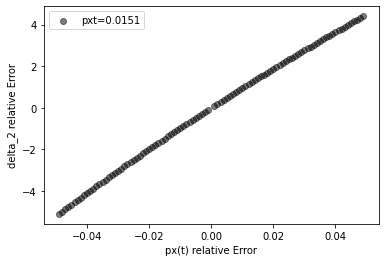

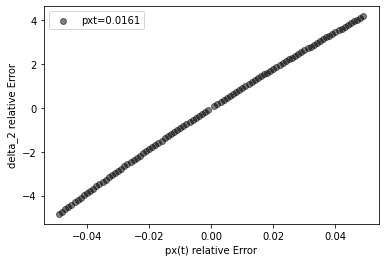

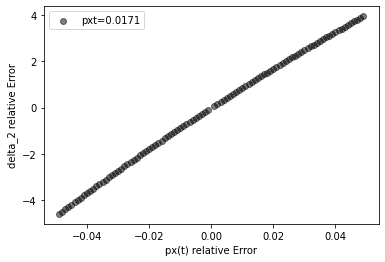

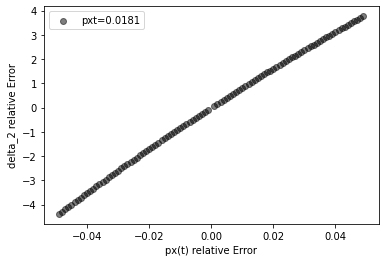

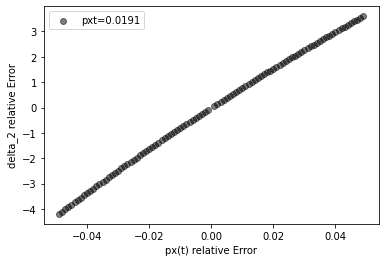

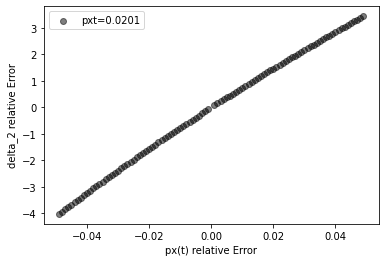

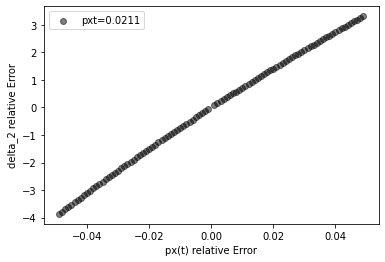

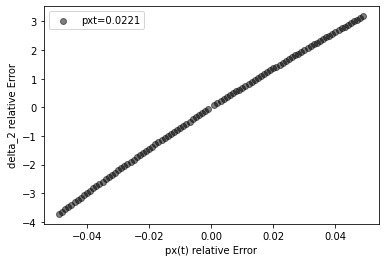

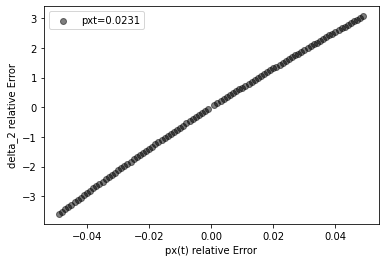

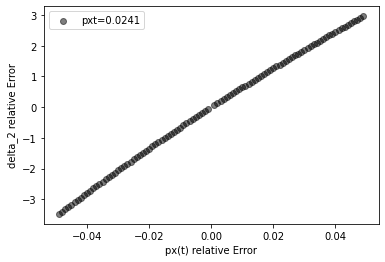

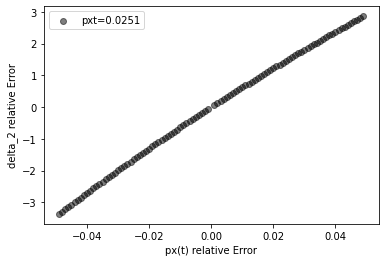

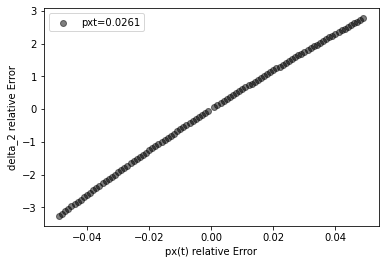

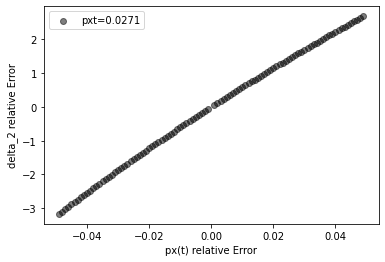

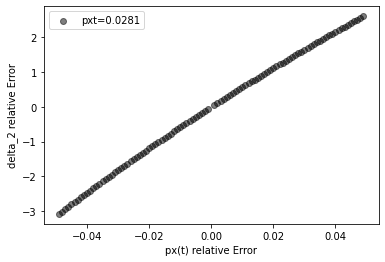

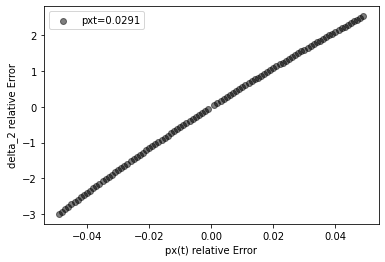

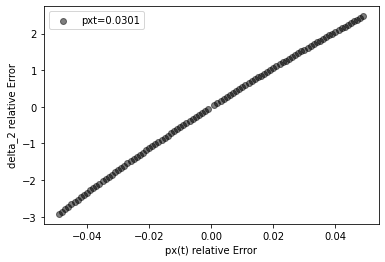

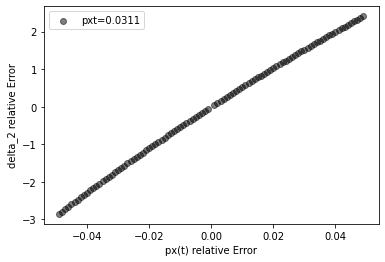

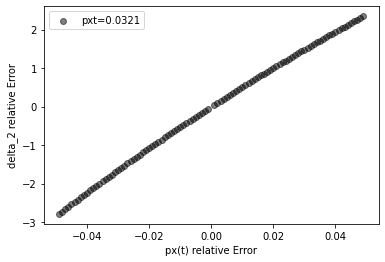

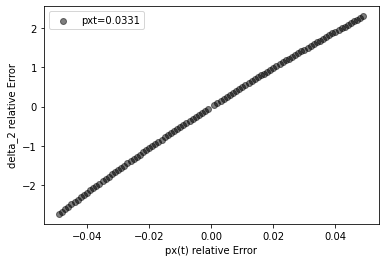

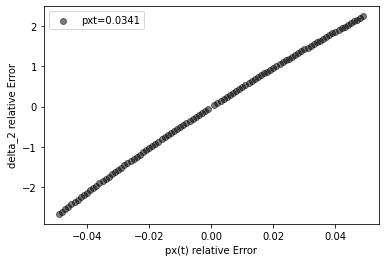

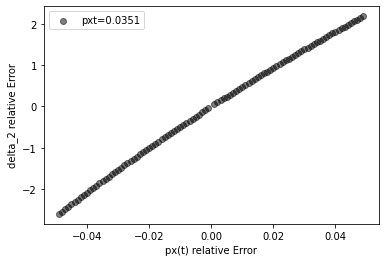

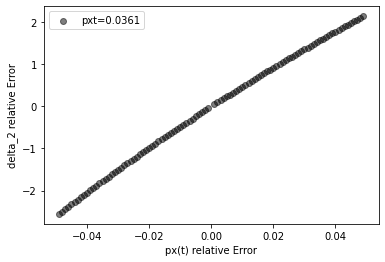

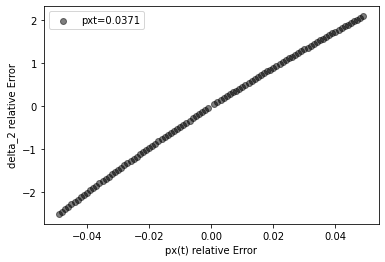

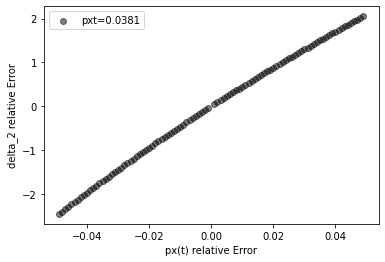

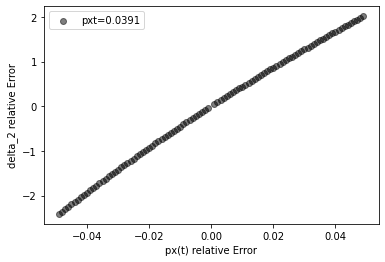

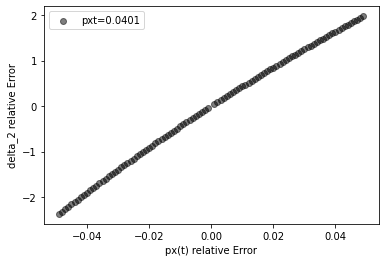

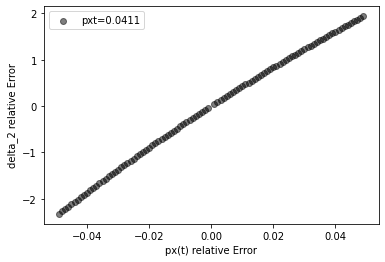

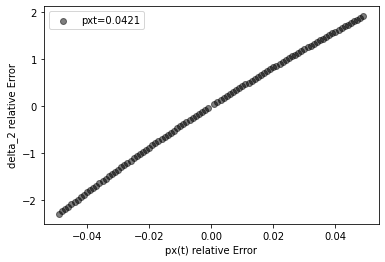

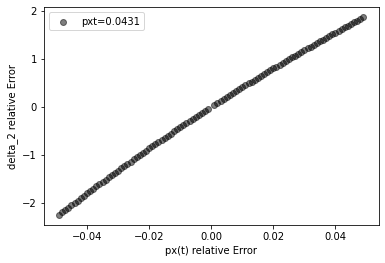

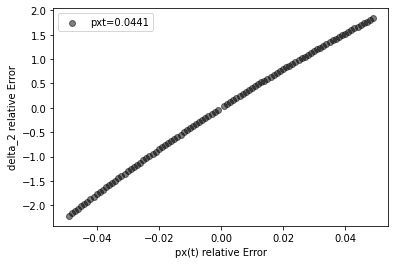

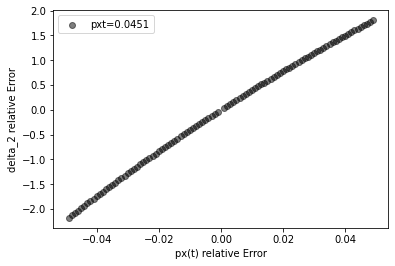

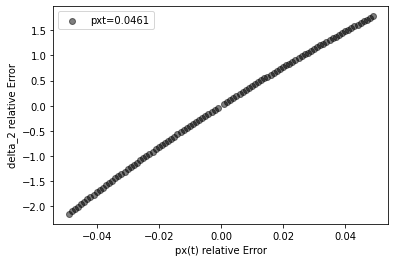

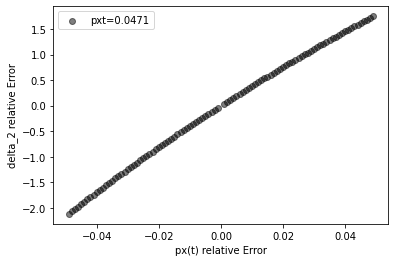

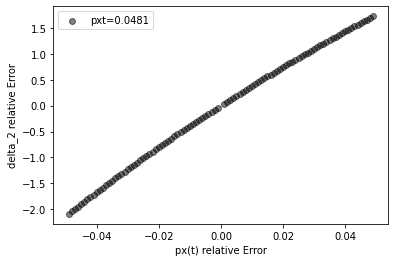

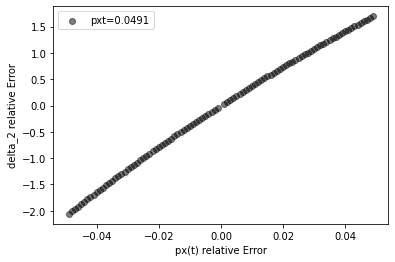

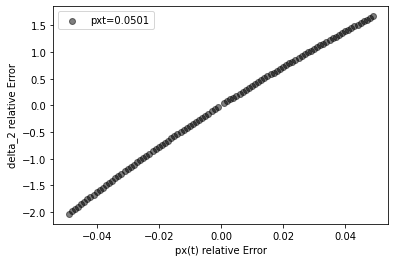

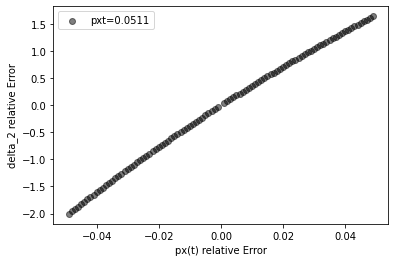

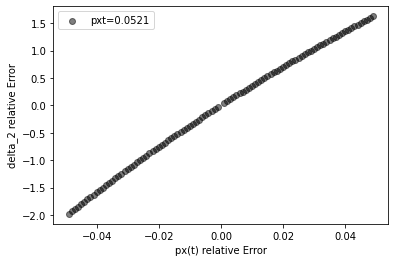

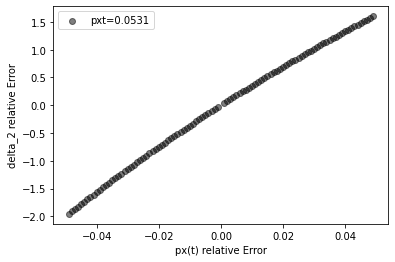

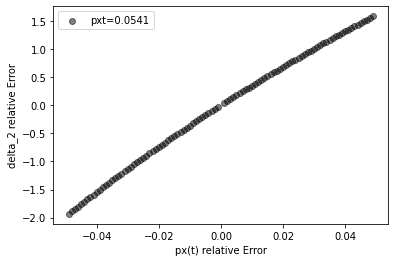

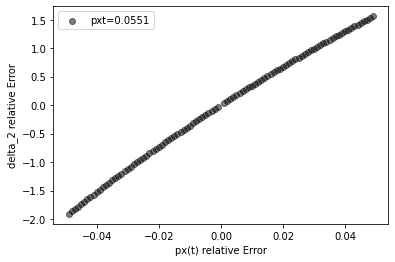

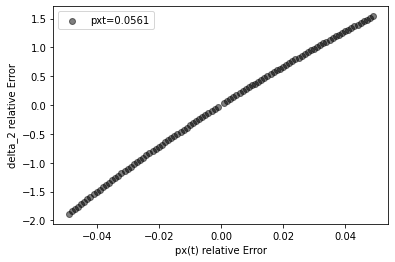

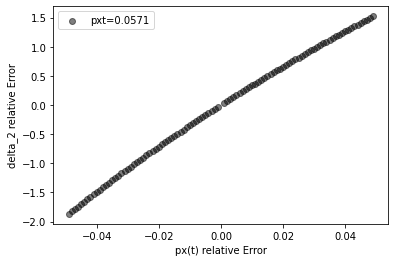

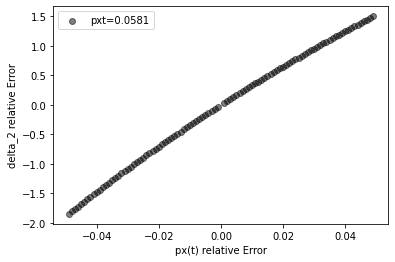

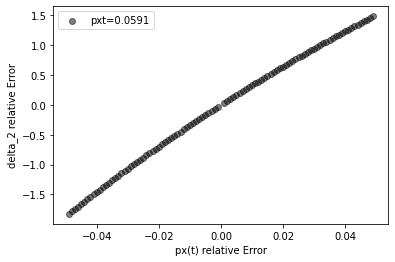

In [15]:
all_res=[]
for k in range(59):#20,21):#59
    k=k + 0*59
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    
    temp_res=[]
    temp_pxt=[]
    for index in range(1):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        x=delta2_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
         
        for i in range(1,50):        
            xs.append(x+i*x/1000)        
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)

            xs.append(x-i*x/1000)
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt) 
    
    all_res.append([temp_res,temp_pxt])

    df=pd.DataFrame()
    for x in all_res:
        df=pd.concat([df,pd.DataFrame(x)],axis=1)
    df=df.transpose()
    df.columns=['pxt_err','delta_2_err']
    plt.scatter(df.pxt_err,df.delta_2_err,label=f'pxt={pxt}',c='k',alpha=0.5)
    plt.xlabel("px(t) relative Error")
    plt.ylabel("delta_2 relative Error")
    plt.legend()
    plt.show()
    all_res=[]

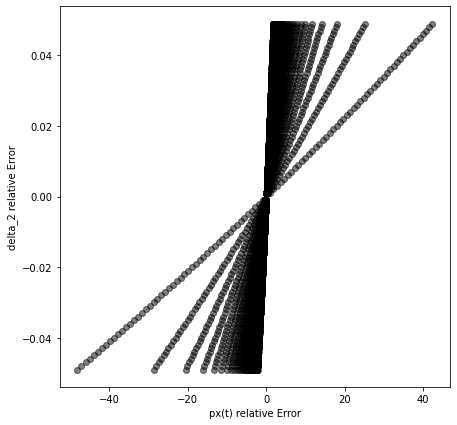

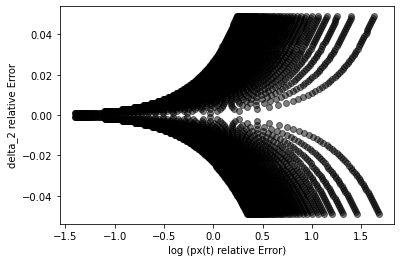

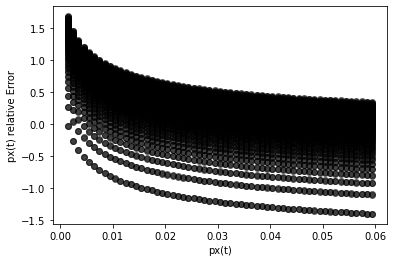

In [45]:
all_res=[]
for k in range(59):#20,21):#59
    k=k + 1*59
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
#     print(k,temp_merged.pep)
    
    temp_res=[]
    temp_pxt=[]
    temp_apxt=[]
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        x=delta2_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
         
        for i in range(1,50):        
            xs.append(x+i*x/1000)        
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)

            xs.append(x-i*x/1000)
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
    all_res.append([temp_res,temp_pxt,temp_apxt])

    

# pd.DataFrame(all_res).transpose()
df=pd.DataFrame()
for x in all_res:
    df=pd.concat([df,pd.DataFrame(x)],axis=1)
df=df.transpose()
df.columns=['delta_2_err','pxt_err','pxt']
plt.figure(figsize=(7,7))
plt.scatter(df.pxt_err,df.delta_2_err,c='k',alpha=0.5)
plt.xlabel("px(t) relative Error")
plt.ylabel("delta_2 relative Error")
plt.show()

plt.scatter([math.log(abs(x),10) for x in df.pxt_err],df.delta_2_err,c='k',alpha=0.5)
plt.xlabel("log (px(t) relative Error)")
plt.ylabel("delta_2 relative Error")
plt.show()

plt.scatter(df.pxt,[math.log(abs(x),10) for x in df.pxt_err],c='k',alpha=0.5)
plt.ylabel("px(t) relative Error")
plt.xlabel("px(t)")
plt.show()

In [44]:
max(df.pxt)

0.05939357113503008

In [285]:
# df=df.dropna()
# df.head()

<Figure size 432x288 with 0 Axes>

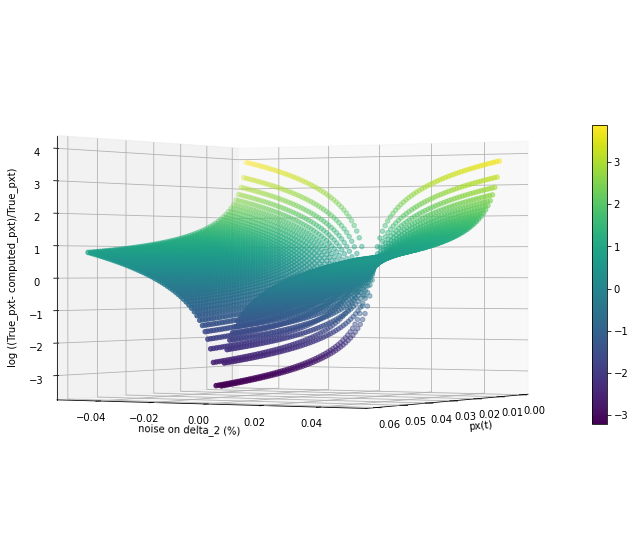

In [21]:
import math
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorbar
from matplotlib.cm import coolwarm

fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt
y = df.delta_2_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)")
plt.ylabel("noise on delta_2 (%)")
ax.set_zlabel("log ((True_pxt- computed_pxt)/True_pxt)")
ax.view_init(0,30)
plt.show()

In [51]:
all_res=[]
temp_res=[]
temp_pxt=[]
temp_apxt=[]
temp_neh=[]
temp_merged_all=data.merge(data2,on=['pep','pxt','neh'])
print(temp_merged_all.shape)
for k in range(58*20+1):#(temp_merged_all.shape[0]):
    temp_merged=temp_merged_all.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    if k%2000 ==0:
        print(100*k/temp_merged_all.shape[0])
    
    
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        neh        =temp_merged.neh     [index]
        
        x=delta2_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
         
        for i in range(1,50):        
            xs.append(x+i*x/1000)        
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
            temp_neh.append(neh)

            xs.append(x-i*x/1000)
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
            temp_neh.append(neh)

df=pd.DataFrame() 
df["delta_2_err"]=temp_res
df["pxt_err"]=temp_pxt
df["pxt"]=temp_apxt
df["neh"]=temp_neh
print(df.shape)



(169271, 15)
0.0
(113778, 4)


<Figure size 432x288 with 0 Axes>

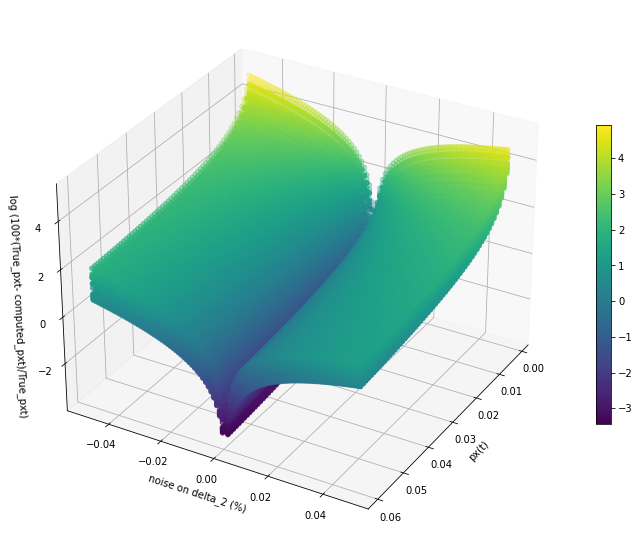

In [52]:
fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt 
y = df.delta_2_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)")
plt.ylabel("noise on delta_2 (%)")
ax.set_zlabel("log (100*(True_pxt- computed_pxt)/True_pxt)")
ax.view_init(30,30)

plt.show()

<Figure size 432x288 with 0 Axes>

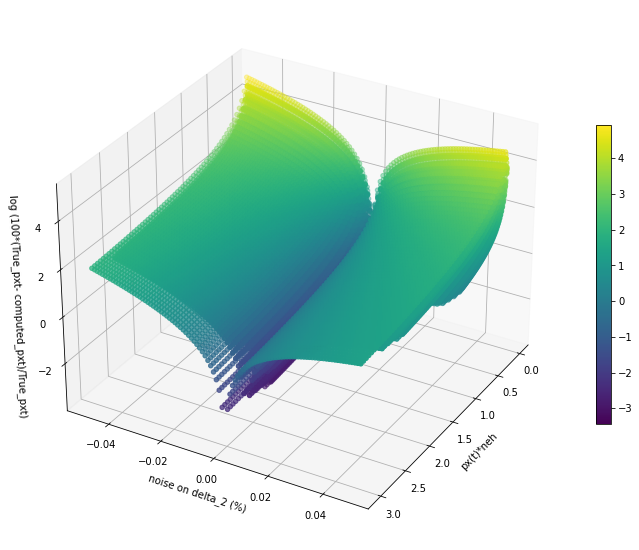

In [53]:
fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt *df.neh
y = df.delta_2_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)*neh")
plt.ylabel("noise on delta_2 (%)")
ax.set_zlabel("log (100*(True_pxt- computed_pxt)/True_pxt)")
ax.view_init(30,30)

plt.show()

In [273]:
all_res=[]
temp_res=[]
temp_pxt=[]
temp_apxt=[]
temp_neh=[]
temp_pep=[]
temp_merged_all=data.merge(data2,on=['pep','pxt','neh'])
print(temp_merged_all.shape)
for k in range(58*100+1):#(temp_merged_all.shape[0]):
    temp_merged=temp_merged_all.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    if k%2000 ==0:
        print(100*k/temp_merged_all.shape[0])
    
    
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        neh        =temp_merged.neh     [index]
        pep        =temp_merged.pep     [index]
        
        x=delta2_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
         
        for i in range(0,51):        
            xs.append(x+i*x/1000)        
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
            temp_neh.append(neh)
            temp_pep.append(pep)

            xs.append(x-i*x/1000)
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
            temp_neh.append(neh)
            temp_pep.append(pep)

df=pd.DataFrame() 
df["delta_2_err"]=[round(x,4) for x in temp_res]
df["pxt_err"]=temp_pxt
df["pxt"]=[round(x,3) for x in temp_apxt]
df["neh"]=temp_neh
df["pep"]=temp_pep
print(df.shape)



(169271, 15)
0.0
1.1815372981786603
2.3630745963573205
(591702, 5)


In [274]:
min(df.neh),max(df.neh)

(9, 60)

In [231]:
(df.pep.unique()).shape

(99,)

In [227]:
# df[(df.delta_2_err==0)&(df.pxt in [0.001411,0.005410,0.010408,0.020405,0.030402,0.040399,0.050396])].drop_duplicates()

In [249]:
plot_data=df.query('abs(delta_2_err) in [0,0.01,0.03,0.05] and pxt in [0.001,0.005,0.01,0.020,0.030,0.040,0.050]').drop_duplicates()
plot_data.delta_2_err=abs(plot_data.delta_2_err)
plot_data.pxt_err=abs(plot_data.pxt_err)
plot_data.head(5)

,delta_2_err,pxt_err,pxt,neh,pep
0,0.00,0.000000,0.001,16,DSTLIMQLLR
20,0.01,9.442609,0.001,16,DSTLIMQLLR
21,0.01,9.197170,0.001,16,DSTLIMQLLR
60,0.03,29.104522,0.001,16,DSTLIMQLLR
61,0.03,26.892500,0.001,16,DSTLIMQLLR


In [250]:
# plot_data.delta_2_err.unique()

In [251]:
plot_data=plot_data[['delta_2_err','pxt_err','pxt']].groupby(by=["pxt","delta_2_err"]).agg({'pxt_err':['mean','std']}).reset_index()

In [252]:
plot_data.delta_2_err.unique()

array([0.  , 0.01, 0.03, 0.05])

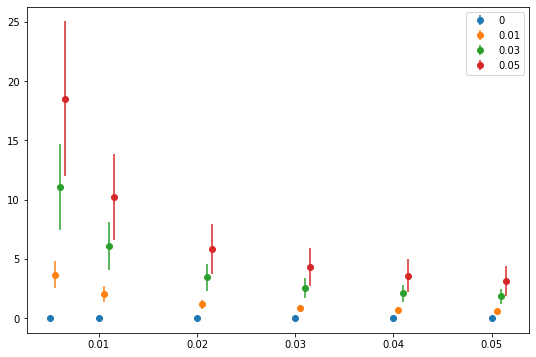

In [272]:
plt.figure(figsize=(9,6))
delta_2_errs=[0,0.01,0.03,0.05]
for i in range(len(delta_2_errs)) :
    delta_2_err=delta_2_errs[i]
    y=[]
    x=[]
    er=[]
    for pxt in [0.005,0.01,0.020,0.030,0.040,0.050]:
        temp=plot_data[(plot_data.pxt==pxt) &(plot_data.delta_2_err==delta_2_err)].reset_index(drop=True)
        temp.columns=['pxt','delta_2_err','avg','sd']
        temp
        # temp.loc['mean',0]
        y.append(float(temp.avg))
        x.append(pxt + i*5E-4)
        er.append(float(temp.sd))
    
                
    plt.errorbar(x, y, er, linestyle='None', marker='o',label=delta_2_err)
    
#     plt.show()
plt.legend()